<a href="https://colab.research.google.com/github/salitha10/Coursera_Capstone/blob/main/Restaurants_in_colombo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>
Colombo is the commercial capital and largest city of Sri Lanka by population. According to the Brookings Institution, Colombo metropolitan area has a population of 5.6 million and 752,993 in the city proper. It is the financial centre of the island and a tourist destination. It is located on the west coast of the island and adjacent to the Greater Colombo area which includes Sri Jayawardenepura Kotte, the legislative capital of Sri Lanka and Dehiwala-Mount Lavinia. Colombo is often referred to as the capital since Sri Jayawardenepura Kotte is itself within the urban/suburban area of Colombo. It is also the administrative capital of the Western Province and the district capital of Colombo District. Colombo is a busy and vibrant city with a mixture of modern life, colonial buildings and monuments.
</p>
<p>
With it’s diverse culture , comes diverse food items. There are many restaurants in Colombo City, each belonging to different categories like Chinese , Italian , French etc.

This project will find out the best chinese restaurents in Colombo and analyze the entire Colombo city to find out best venues.
</p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in Colombo City for Chinese Cuisines ? 
- Which areas have large number of Chinese Resturants ? 
- Which all areas have less number of resturants ?
- Which is the best place to stay if you prefer Chinese Cuisines ?
- What places are have best restaurants in Colombo?

### Data
For this project we need the following data :
<ul>
<li> Colombo Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of Colombo city.
     </ul>
<li> Nearby places in each locality of Colombo city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the Colombo city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [11]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import geocoder

## Read the zomato resturant data from csv file

In [85]:
# Read cvs file
df = pd.read_csv('https://raw.githubusercontent.com/salitha10/Coursera_Capstone/main/zomato.csv',encoding='ISO-8859-1')
df.head()
#df2 = df[df['City'].str.contains("Colombo")]
#df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [86]:
# Get all restaurants in colombo
df_SL = df[df['Country Code'] == 191]
df_res = df_SL[df_SL['City'] == 'Colombo']
df_res.reset_index(drop=True, inplace=True)
df_res.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,5800557,Chinese Dragon Cafe,191,Colombo,"11, Milagiriya Avenue, Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04, Colombo",79.856678,6.886341,Chinese,2000,Sri Lankan Rupee(LKR),No,No,No,No,3,3.4,Orange,Average,118
1,5800634,Elite Indian Restaurant,191,Colombo,"124, New Bullers Road, Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04, Colombo",79.857830,6.896084,"North Indian, Chinese, Sri Lankan",1800,Sri Lankan Rupee(LKR),No,No,No,No,2,2.4,Red,Poor,240
2,5800567,CIOCONAT Lounge,191,Colombo,"107, Barnes Place, Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.875114,6.912806,"Italian, Cafe, Desserts",2500,Sri Lankan Rupee(LKR),No,No,No,No,3,3.7,Yellow,Good,157
3,5800891,The Paddington,191,Colombo,"36, Barnes Place, Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.868492,6.913292,"Cafe, Italian",2000,Sri Lankan Rupee(LKR),No,No,No,No,3,3.6,Yellow,Good,83
4,5800590,The Commons,191,Colombo,"39 A, Flower Road, Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.858105,6.908536,"Cafe, Sri Lankan, Continental, American",2500,Sri Lankan Rupee(LKR),No,No,No,No,3,4.0,Green,Very Good,209


## Data Cleaning
#### Remove unnecessary columns and rows from the dataset

In [87]:
df_all= df_res[df_res.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [88]:
df_all = df_all[df_all['Aggregate rating'] !=0.0]
df_all.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Chinese Dragon Cafe,"Bambalapitiya, Colombo 04",79.856678,6.886341,Chinese,3.4,Average,118
1,Elite Indian Restaurant,"Bambalapitiya, Colombo 04",79.857830,6.896084,"North Indian, Chinese, Sri Lankan",2.4,Poor,240
2,CIOCONAT Lounge,"Cinnamon Gardens, Colombo 07",79.875114,6.912806,"Italian, Cafe, Desserts",3.7,Good,157
3,The Paddington,"Cinnamon Gardens, Colombo 07",79.868492,6.913292,"Cafe, Italian",3.6,Good,83
4,The Commons,"Cinnamon Gardens, Colombo 07",79.858105,6.908536,"Cafe, Sri Lankan, Continental, American",4.0,Very Good,209


### Map showing restaurants

In [90]:
# Get map
restaurants = folium.Map(location=[6.9271, 79.8612], zoom_start=10)

X = df_all['Latitude']
Y = df_all['Longitude']
Z = np.stack((X, Y), axis=1)

# clusture
kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_all ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_all['Latitude'], df_all['Longitude'], df_all['Locality'], df_all['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(restaurants)  

restaurants

## Locations with best restaurants in Colombo?


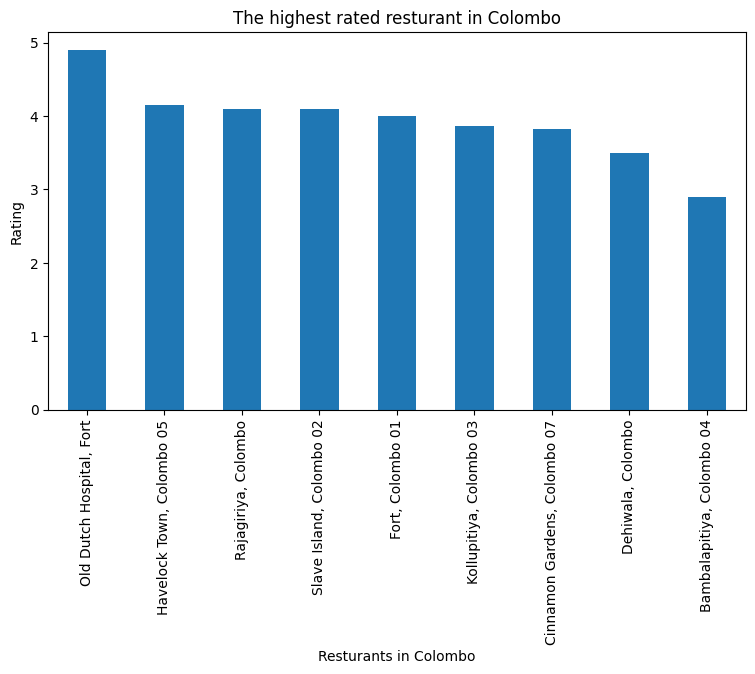

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in Colombo')

# display bar chart
df_all.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.xlabel('Resturants in Colombo')
plt.ylabel('Rating')
plt.show()


In [91]:
df_all

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Chinese Dragon Cafe,"Bambalapitiya, Colombo 04",79.856678,6.886341,Chinese,3.4,Average,118,2
1,Elite Indian Restaurant,"Bambalapitiya, Colombo 04",79.857830,6.896084,"North Indian, Chinese, Sri Lankan",2.4,Poor,240,2
2,CIOCONAT Lounge,"Cinnamon Gardens, Colombo 07",79.875114,6.912806,"Italian, Cafe, Desserts",3.7,Good,157,0
3,The Paddington,"Cinnamon Gardens, Colombo 07",79.868492,6.913292,"Cafe, Italian",3.6,Good,83,0
4,The Commons,"Cinnamon Gardens, Colombo 07",79.858105,6.908536,"Cafe, Sri Lankan, Continental, American",4.0,Very Good,209,0
5,Upali's,"Cinnamon Gardens, Colombo 07",79.864727,6.912529,Sri Lankan,4.0,Very Good,114,0
6,Malay Restaurant,"Dehiwala, Colombo",79.870890,6.850283,"Malaysian, North Indian, Sri Lankan",3.5,Good,80,1
7,T.G.I. Friday's,"Fort, Colombo 01",79.843575,6.932547,"American, Steak",4.0,Very Good,166,3
8,Simply Strawberries By Jagro,"Havelock Town, Colombo 05",79.879433,6.883739,"Juices, Desserts",4.5,Excellent,146,2
9,Cafe Shaze,"Havelock Town, Colombo 05",79.865639,6.890906,"Cafe, Fast Food, Beverages",3.8,Good,81,2


The best restarants are available in <b>Old Dutch Hospital, Fort</b>

## Locations with worst restaurants in Colombo?

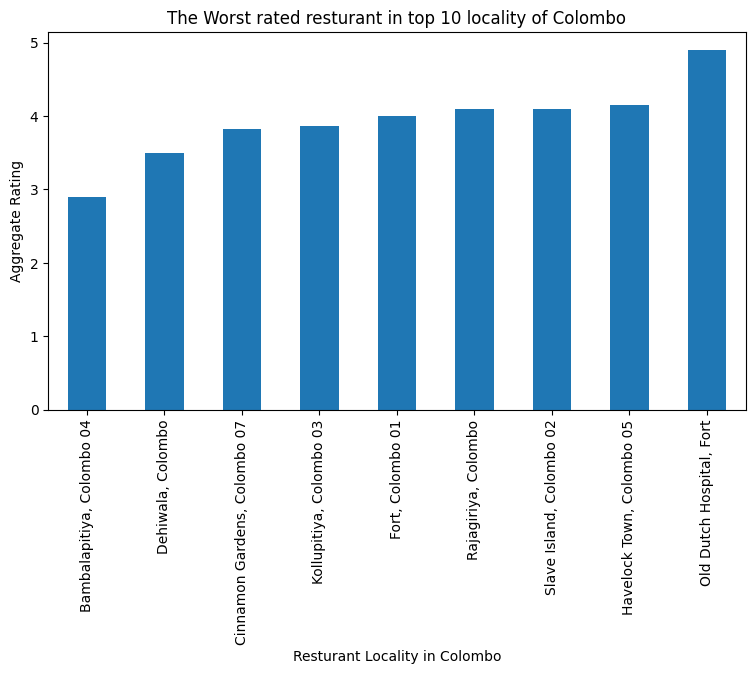

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The Worst rated resturant in top 10 locality of Colombo')
df_all.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Colombo')
plt.ylabel('Aggregate Rating')
plt.show()

The worst restarants are available in <b>Bambalapitiya, Colombo 4.</b>

## Best places to dine in Colombo

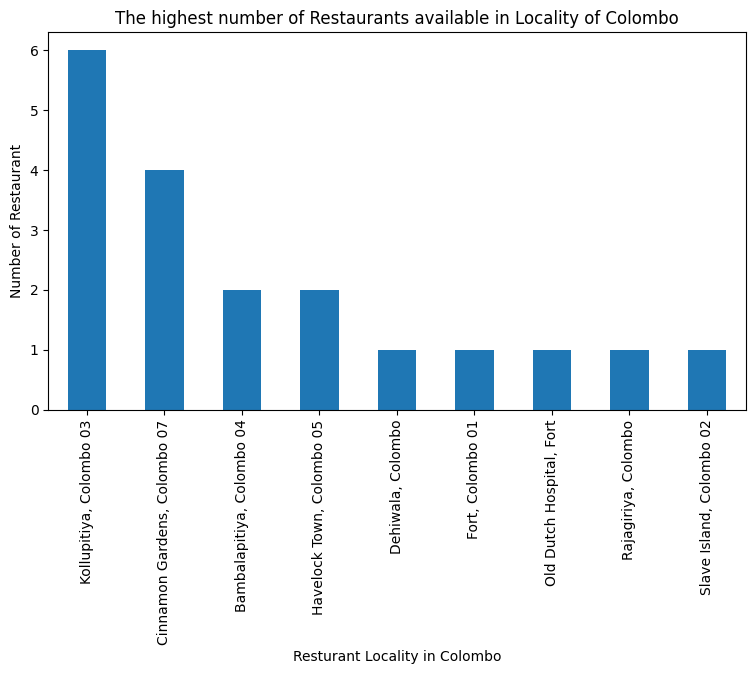

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurants available in Locality of Colombo')

df_all.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Colombo')
plt.ylabel('Number of Restaurant')
plt.show()

<b>Kollupitiya, Colombo 3</b> is the best place to dine in Colombo.

## Which locations are not suitable for dine in Colombo?

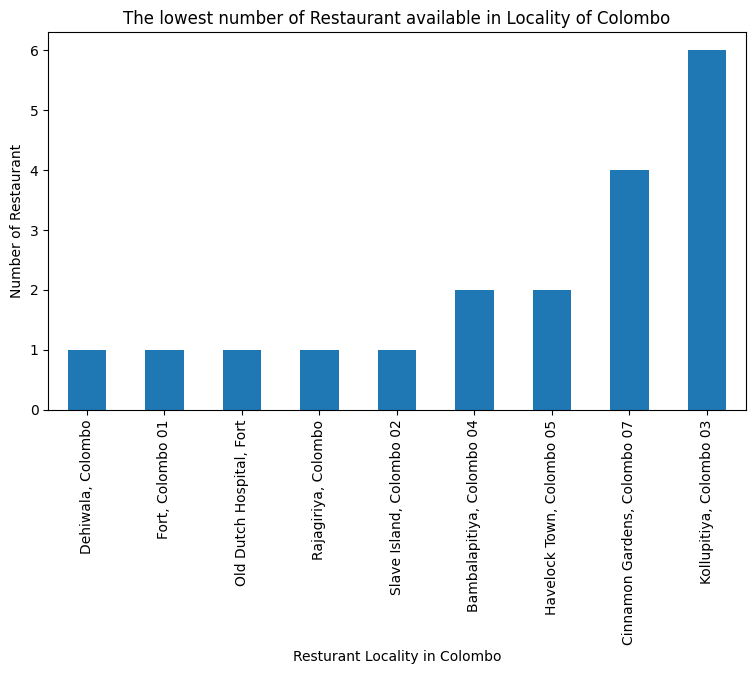

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Colombo')
#On x-axis

#giving a bar plot
df_all.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Colombo')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## The best places for chinese restaurants in Colombo

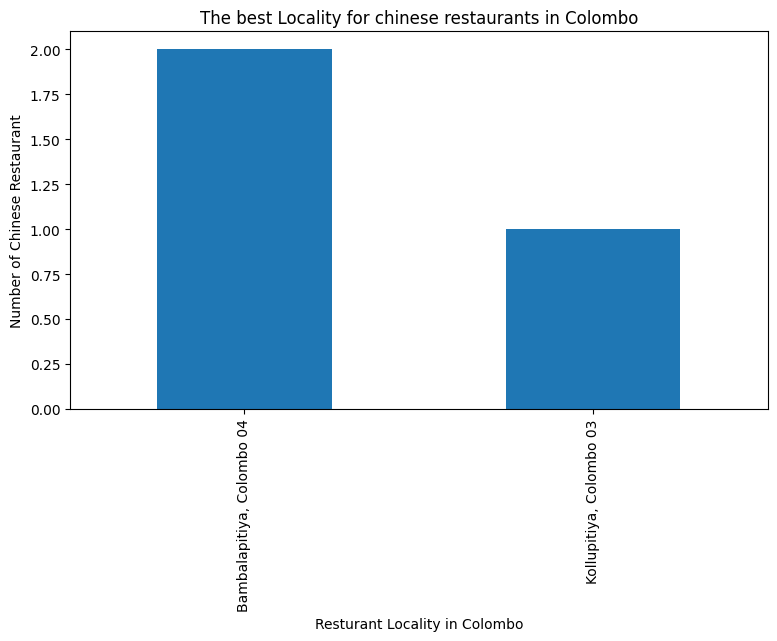

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurants in Colombo')
#On x-axis

#giving a bar plot
df_all[df_all['Cuisines'].str.contains('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Colombo')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

<b>Bambalapitiya</b> is the best place for Chinese restaurants.

## Best chinese restaurents in Colombo 

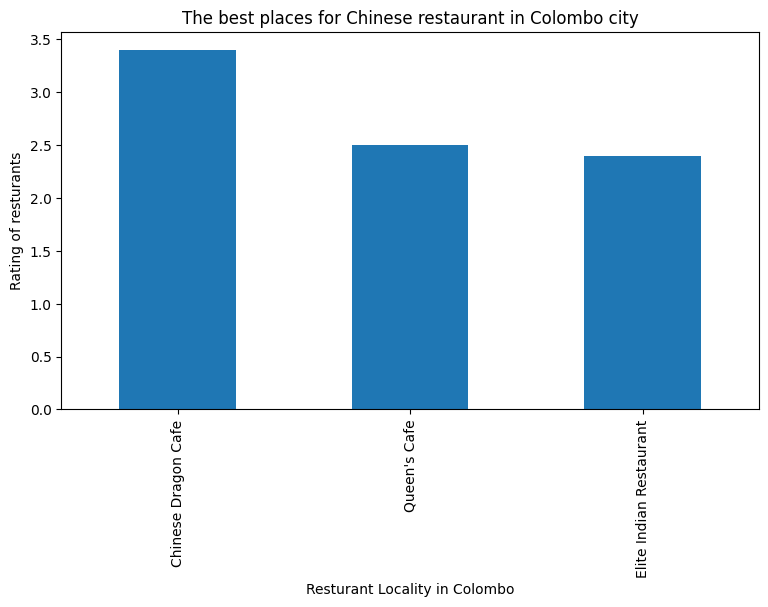

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Colombo city')

df_all[df_all['Cuisines'].str.contains('Chinese')].groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')
plt.xlabel('Resturant Locality in Colombo')
plt.ylabel('Rating of resturants')
plt.show()

<b> Chinese Dragon Cafe</b> is the best Chinese resturant in Colombo.

### Data transformation
Based on Locality grouping the data

In [97]:
df_all_Loc =  df_all.groupby('Locality').count()['Restaurant Name'].to_frame()
df_all_rating= df_all.groupby('Locality')['Aggregate rating'].mean().to_frame()

df_Cuisines = df_all.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
df_R = df_all.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
df_V = df_all.groupby(['Locality'])['Votes'].sum().to_frame()
df_Lat = df_all.groupby('Locality').mean()['Latitude'].to_frame()
df_Lng = df_all.groupby('Locality').mean()['Longitude'].to_frame()

# Merge
df_trans = pd.merge(df_Lat,df_Lng,on='Locality').merge(df_all_Loc, on='Locality').merge(df_Cuisines, on='Locality').merge(df_all_rating,on ='Locality').merge(df_R, on ='Locality').merge(df_V, on ='Locality')

In [98]:
df_trans = df_trans[df_trans['Aggregate rating'] != 0.000000]
df_trans.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_trans.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Bambalapitiya, Colombo 04",6.891212,79.857254,2,"Chinese, North Indian, Chinese, Sri Lankan",2.900,"Average, Poor",358
1,"Cinnamon Gardens, Colombo 07",6.911791,79.866609,4,"Italian, Cafe, Desserts, Cafe, Italian, Cafe, ...",3.825,"Good, Very Good",563
2,"Dehiwala, Colombo",6.850283,79.870890,1,"Malaysian, North Indian, Sri Lankan",3.500,Good,80
3,"Fort, Colombo 01",6.932547,79.843575,1,"American, Steak",4.000,Very Good,166
4,"Havelock Town, Colombo 05",6.887322,79.872536,2,"Juices, Desserts, Cafe, Fast Food, Beverages",4.150,"Excellent, Good",227


## Foursquare Credentials

In [99]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'VUOXS0IJKYVTB5P4OQ0DOMHFZBRC1BRDYWUKSQHLUKQAAYB1'
CLIENT_SECRET = 'E1OLOME2QLEUVIHRLGJSDLAAJLK2P3DK4PUDQSFARXJDYL5P'
VERSION = '20210701' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VUOXS0IJKYVTB5P4OQ0DOMHFZBRC1BRDYWUKSQHLUKQAAYB1
CLIENT_SECRET:E1OLOME2QLEUVIHRLGJSDLAAJLK2P3DK4PUDQSFARXJDYL5P


## Find venues

In [100]:

def findVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Latitude', 
                  'Longitude', 
                  'Restaurent', 
                  'Restaurent Latitude', 
                  'Restaurent Longitude', 
                  'Category']
    
    return(nearby_venues)

In [101]:
# Find the venues in Colombo
colombo_ven = findVenues(names=df_trans['Locality'],
                                   latitudes=df_trans['Lat'],
                                   longitudes=df_trans['Lng']
                                  )
colombo_ven.head()

Bambalapitiya, Colombo 04
Cinnamon Gardens, Colombo 07
Dehiwala, Colombo
Fort, Colombo 01
Havelock Town, Colombo 05
Kollupitiya, Colombo 03
Old Dutch Hospital, Fort
Rajagiriya, Colombo
Slave Island, Colombo 02


,Locality,Latitude,Longitude,Restaurent,Restaurent Latitude,Restaurent Longitude,Category
0,"Bambalapitiya, Colombo 04",6.891212,79.857254,Raja Jewellers,6.889743,79.856922,Jewelry Store
1,"Bambalapitiya, Colombo 04",6.891212,79.857254,CASA Colombo,6.888822,79.857499,Asian Restaurant
2,"Bambalapitiya, Colombo 04",6.891212,79.857254,Dindigul Thalappakatti,6.888474,79.858556,South Indian Restaurant
3,"Bambalapitiya, Colombo 04",6.891212,79.857254,Redline Technologies,6.893340,79.857345,Electronics Store
4,"Bambalapitiya, Colombo 04",6.891212,79.857254,MD Gunasena,6.890990,79.858664,Bookstore


In [102]:
colombo_ven.groupby('Locality').count()

,Latitude,Longitude,Restaurent,Restaurent Latitude,Restaurent Longitude,Category
Locality,,,,,,
"Bambalapitiya, Colombo 04",28,28,28,28,28,28
"Cinnamon Gardens, Colombo 07",36,36,36,36,36,36
"Dehiwala, Colombo",17,17,17,17,17,17
"Fort, Colombo 01",47,47,47,47,47,47
"Havelock Town, Colombo 05",9,9,9,9,9,9
"Kollupitiya, Colombo 03",61,61,61,61,61,61
"Old Dutch Hospital, Fort",44,44,44,44,44,44
"Rajagiriya, Colombo",23,23,23,23,23,23
"Slave Island, Colombo 02",18,18,18,18,18,18


In [103]:
# Analyze Each Locality

cmb = pd.get_dummies(colombo_ven[['Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
cmb['Locality'] = colombo_ven['Locality'] 
column_list = cmb.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
cmb = cmb[column_list]

cmb.head()

,Locality,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Café,Candy Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Dessert Shop,Dive Spot,Electronics Store,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,General Travel,Government Building,...,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lounge,Malay Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Nightclub,North Indian Restaurant,Office,Optical Shop,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,South Indian Restaurant,Spa,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Taco Place,Tea Room,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Water Park,Women's Store
0,"Bambalapitiya, Colombo 04",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Bambalapitiya, Colombo 04",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Bambalapitiya, Colombo 04",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,"Bambalapitiya, Colombo 04",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Bambalapitiya, Colombo 04",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
cmb_grouped = cmb.groupby('Locality').mean().reset_index()
cmb_grouped

,Locality,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Café,Candy Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Dessert Shop,Dive Spot,Electronics Store,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,General Travel,Government Building,...,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lounge,Malay Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Nightclub,North Indian Restaurant,Office,Optical Shop,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,South Indian Restaurant,Spa,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Taco Place,Tea Room,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Water Park,Women's Store
0,"Bambalapitiya, Colombo 04",0.035714,0.000000,0.000000,0.107143,0.000000,0.000000,0.035714,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.000000,0.00000,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.035714,0.000000,0.000000,0.071429,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000
1,"Cinnamon Gardens, Colombo 07",0.000000,0.055556,0.000000,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.055556,0.000000,0.027778,0.000000,0.000000,0.000000,0.055556,0.000000,0.00000,0.000000,0.027778,0.027778,0.083333,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.000000,0.055556,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,0.000000,0.000000,0.027778
2,"Dehiwala, Colombo",0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.00000,0.058824,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824
3,"Fort, Colombo 01",0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.085106,0.000000,0.00000,0.021277,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,...,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000,0.085106,0.000000,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.042553,0.042553,0.000000,0.085106,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.021277,0.042553,0.000

In [105]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in cmb_grouped['Locality']:
    print("----"+hood+"----")
    temp = cmb_grouped[cmb_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bambalapitiya, Colombo 04----
                           venue  freq
0               Asian Restaurant  0.11
1  Vegetarian / Vegan Restaurant  0.11
2                 Clothing Store  0.11
3                  Jewelry Store  0.07
4                      Bookstore  0.07


----Cinnamon Gardens, Colombo 07----
            venue  freq
0     Coffee Shop  0.08
1             Pub  0.06
2  Breakfast Spot  0.06
3            Café  0.06
4     Art Gallery  0.06


----Dehiwala, Colombo----
                venue  freq
0       Women's Store  0.06
1         Candy Store  0.06
2    Malay Restaurant  0.06
3                 Gym  0.06
4  Falafel Restaurant  0.06


----Fort, Colombo 01----
                venue  freq
0               Hotel  0.11
1                Café  0.09
2              Lounge  0.09
3  Seafood Restaurant  0.09
4          Restaurant  0.04


----Havelock Town, Colombo 05----
                     venue  freq
0           Clothing Store  0.22
1                    Hotel  0.11
2  South Indian Restaur

In [106]:
# Find all popular venues

def popular_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [107]:
# Top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns
columns = ['Locality']
for x in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(x+1, xicators[x]))
    except:
        columns.append('{}th Most Common Venue'.format(x+1))

Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = cmb_grouped['Locality']

for x in np.arange(cmb_grouped.shape[0]):
    Locality_venues_sorted.iloc[x, 1:] = popular_venues(cmb_grouped.iloc[x, :], num_top_venues)

Locality_venues_sorted

,Locality,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bambalapitiya, Colombo 04",Vegetarian / Vegan Restaurant,Clothing Store,Asian Restaurant,Jewelry Store,Pizza Place,Bookstore,IT Services,Burger Joint,Café,Juice Bar
1,"Cinnamon Gardens, Colombo 07",Coffee Shop,Breakfast Spot,Café,Pub,Art Gallery,Bar,Athletics & Sports,Bubble Tea Shop,Clothing Store,Cocktail Bar
2,"Dehiwala, Colombo",Women's Store,Sandwich Place,Falafel Restaurant,Cosmetics Shop,Convenience Store,Malay Restaurant,Comfort Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place
3,"Fort, Colombo 01",Hotel,Seafood Restaurant,Lounge,Café,Nightclub,Restaurant,Bar,Buffet,Pub,Steakhouse
4,"Havelock Town, Colombo 05",Clothing Store,South Indian Restaurant,Hotel,Thai Restaurant,Café,Bakery,Fast Food Restaurant,Seafood Restaurant,Dessert Shop,Coffee Shop
5,"Kollupitiya, Colombo 03",Chinese Restaurant,Coffee Shop,Bakery,Dessert Shop,Casino,Hotel,Restaurant,Indian Restaurant,Jewelry Store,Clothing Store
6,"Old Dutch Hospital, Fort",Café,Seafood Restaurant,Hotel,Lounge,Nightclub,Steakhouse,Pub,Restaurant,Bar,Tea Room
7,"Rajagiriya, Colombo",Chinese Restaurant,Clothing Store,Café,Asian Restaurant,Restaurant,Fast Food Restaurant,Dessert Shop,Coffee Shop,Korean Restaurant,Convenience Store
8,"Slave Island, Colombo 02",Hotel,General Travel,Bar,Government Building,Soccer Field,Chinese Restaurant,Coffee Shop,Bus Station,Restaurant,Lounge


In [108]:
# Run k-means to cluster the Locality into 5 clusters.

kclusters = 5
cmb_clustering = cmb_grouped.drop('Locality', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cmb_clustering)
kmeans.labels_[0:10] 
kmeans.labels_.shape

(9,)

In [109]:
# add clustering labels
cmb_merged = df_trans.head(240)
cmb_merged['Cluster Labels'] = kmeans.labels_

# merge cmb_grouped with df_Chinese to add latitude/longitude for each Locality
cmb_merged = cmb_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

cmb_merged.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bambalapitiya, Colombo 04",6.891212,79.857254,2,"Chinese, North Indian, Chinese, Sri Lankan",2.900,"Average, Poor",358,4,Vegetarian / Vegan Restaurant,Clothing Store,Asian Restaurant,Jewelry Store,Pizza Place,Bookstore,IT Services,Burger Joint,Café,Juice Bar
1,"Cinnamon Gardens, Colombo 07",6.911791,79.866609,4,"Italian, Cafe, Desserts, Cafe, Italian, Cafe, ...",3.825,"Good, Very Good",563,1,Coffee Shop,Breakfast Spot,Café,Pub,Art Gallery,Bar,Athletics & Sports,Bubble Tea Shop,Clothing Store,Cocktail Bar
2,"Dehiwala, Colombo",6.850283,79.870890,1,"Malaysian, North Indian, Sri Lankan",3.500,Good,80,1,Women's Store,Sandwich Place,Falafel Restaurant,Cosmetics Shop,Convenience Store,Malay Restaurant,Comfort Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place
3,"Fort, Colombo 01",6.932547,79.843575,1,"American, Steak",4.000,Very Good,166,0,Hotel,Seafood Restaurant,Lounge,Café,Nightclub,Restaurant,Bar,Buffet,Pub,Steakhouse
4,"Havelock Town, Colombo 05",6.887322,79.872536,2,"Juices, Desserts, Cafe, Fast Food, Beverages",4.150,"Excellent, Good",227,2,Clothing Store,South Indian Restaurant,Hotel,Thai Restaurant,Café,Bakery,Fast Food Restaurant,Seafood Restaurant,Dessert Shop,Coffee Shop


In [111]:
# Map
clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers
markers_colors = []
for lat, lon, poi, cluster in zip(cmb_merged['Lat'], cmb_merged['Lng'], cmb_merged['Locality'], cmb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(clusters)
       
clusters

In [112]:
# Cluster 1
cmb_merged.loc[cmb_merged['Cluster Labels'] == 0, cmb_merged.columns[[1] + list(range(5, cmb_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,6.932547,4.0,Very Good,166,0,Hotel,Seafood Restaurant,Lounge,Café,Nightclub,Restaurant,Bar,Buffet,Pub,Steakhouse
6,6.932814,4.9,Excellent,203,0,Café,Seafood Restaurant,Hotel,Lounge,Nightclub,Steakhouse,Pub,Restaurant,Bar,Tea Room


In [113]:
# Cluster 2
cmb_merged.loc[cmb_merged['Cluster Labels'] == 1, cmb_merged.columns[[1] + list(range(5, cmb_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,6.911791,3.825000,"Good, Very Good",563,1,Coffee Shop,Breakfast Spot,Café,Pub,Art Gallery,Bar,Athletics & Sports,Bubble Tea Shop,Clothing Store,Cocktail Bar
2,6.850283,3.500000,Good,80,1,Women's Store,Sandwich Place,Falafel Restaurant,Cosmetics Shop,Convenience Store,Malay Restaurant,Comfort Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place
5,6.905393,3.866667,"Average, Very Good",904,1,Chinese Restaurant,Coffee Shop,Bakery,Dessert Shop,Casino,Hotel,Restaurant,Indian Restaurant,Jewelry Store,Clothing Store
7,6.906815,4.100000,Very Good,58,1,Chinese Restaurant,Clothing Store,Café,Asian Restaurant,Restaurant,Fast Food Restaurant,Dessert Shop,Coffee Shop,Korean Restaurant,Convenience Store


In [114]:
# Cluster 3
cmb_merged.loc[cmb_merged['Cluster Labels'] == 2, cmb_merged.columns[[1] + list(range(5, cmb_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,6.887322,4.15,"Excellent, Good",227,2,Clothing Store,South Indian Restaurant,Hotel,Thai Restaurant,Café,Bakery,Fast Food Restaurant,Seafood Restaurant,Dessert Shop,Coffee Shop


In [115]:
# Cluster 4
cmb_merged.loc[cmb_merged['Cluster Labels'] ==3 , cmb_merged.columns[[1] + list(range(5, cmb_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,6.923933,4.1,Very Good,199,3,Hotel,General Travel,Bar,Government Building,Soccer Field,Chinese Restaurant,Coffee Shop,Bus Station,Restaurant,Lounge


In [116]:
# Cluster 5
cmb_merged.loc[cmb_merged['Cluster Labels'] == 4, cmb_merged.columns[[1] + list(range(5, cmb_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6.891212,2.9,"Average, Poor",358,4,Vegetarian / Vegan Restaurant,Clothing Store,Asian Restaurant,Jewelry Store,Pizza Place,Bookstore,IT Services,Burger Joint,Café,Juice Bar


### Conclusions 
- The best restarants are available in Old Dutch Hospital, Fort. 
- The worst restarants are available in Bambalapitiya, Colombo 4.
- Kollupitiya, Colombo 3 is the best place to dine in Colombo.
- Bambalapitiya is the best place for Chinese restaurants.
- Chinese Dragon Cafe is the best Chinese resturant in Colombo.
#### Cluster 1,4:
 It is most recommended for Hotels.
#### Cluster 2:
 It is most recommended for Chinese Restaurants.
#### Cluster 3:
 It is most recommended for Clothing Stores.
#### Cluster 5:
 It is most recommended for Vegetarian / Vegan Restaurants.
    